# Data Analysis
Worked out some statistical tests and tried to find the relations between the different attributes and the price of the car. Used small visualisations to get a better understanding on how closely the attribute is related to the price of the car.

In [7]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("clean_df.csv", index_col=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length,horsepower-binned,price-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,8.703704,11.190476,0.816054,0.890278,0.811148,Low,Low
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,9.038462,12.368421,0.876254,0.909722,0.822681,Medium,Low
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,7.833333,9.791667,0.908027,0.919444,0.848630,Low,Low
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,10.681818,13.055556,0.908027,0.922222,0.848630,Low,Low
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,19,25,15250.0,9.400000,12.368421,0.887960,0.920833,0.851994,Low,Low


In [4]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
highway-L/100km      float64
city-L/100km         float64
normalized-height    float64
normalized-width     float64
normalized-length    float64
horsepower-binned     object
price-binned          object
dtype: object

### Correlation between the attributes

In [5]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,normalized-height,normalized-width,normalized-length
symboling,1.000000,0.469772,-0.529145,-0.364511,-0.237262,-0.542261,-0.234743,-0.112069,-0.145667,0.008244,...,0.074594,0.284011,-0.030158,0.041248,-0.083327,-0.033159,0.062423,-0.542261,-0.237262,-0.364511
normalized-losses,0.469772,1.000000,-0.057068,0.019433,0.086961,-0.377664,0.099404,0.112362,-0.029867,0.055759,...,0.217323,0.239580,-0.225255,-0.182011,0.133999,0.181247,0.238712,-0.377664,0.086961,0.019433
wheel-base,-0.529145,-0.057068,1.000000,0.879005,0.814593,0.583789,0.787584,0.576779,0.501534,0.144675,...,0.375689,-0.364971,-0.480029,-0.552211,0.589147,0.584953,0.484047,0.583789,0.814593,0.879005
length,-0.364511,0.019433,0.879005,1.000000,0.857271,0.492955,0.881058,0.685531,0.610817,0.120888,...,0.580515,-0.286754,-0.667658,-0.700186,0.691044,0.708466,0.659174,0.492955,0.857271,1.000000
width,-0.237262,0.086961,0.814593,0.857271,1.000000,0.300995,0.867720,0.731100,0.548478,0.182855,...,0.617062,-0.247388,-0.638155,-0.684700,0.752795,0.739845,0.677111,0.300995,1.000000,0.857271
height,-0.542261,-0.377664,0.583789,0.492955,0.300995,1.000000,0.310660,0.076255,0.187794,-0.081273,...,-0.085763,-0.315756,-0.057087,-0.111568,0.137284,0.088903,0.008923,1.000000,0.300995,0.492955
curb-weight,-0.234743,0.099404,0.787584,0.881058,0.867720,0.310660,1.000000,0.849090,0.644532,0.168642,...,0.758089,-0.279411,-0.750390,-0.795515,0.834420,0.837217,0.785868,0.310660,0.867720,0.881058
engine-size,-0.112069,0.112362,0.576779,0.685531,0.731100,0.076255,0.849090,1.000000,0.572786,0.208004,...,0.822669,-0.256702,-0.651002,-0.679877,0.872337,0.783593,0.745337,0.076255,0.731100,0.685531
bore,-0.145667,-0.029867,0.501534,0.610817,0.548478,0.187794,0.644532,0.572786,1.000000,-0.051087,...,0.566736,-0.267010,-0.581365,-0.590753,0.543431,0.558759,0.554069,0.187794,0.548478,0.610817
stroke,0.008244,0.055759,0.144675,0.120888,0.182855,-0.081273,0.168642,0.208004,-0.051087,1.000000,...,0.100547,-0.066173,-0.040677,-0.040282,0.083296,0.051148,0.041470,-0.081273,0.182855,0.120888


In [6]:
df[['bore','stroke','horsepower', 'compression-ratio']].corr()

,bore,stroke,horsepower,compression-ratio
bore,1.000000,-0.051087,0.566736,0.002021
stroke,-0.051087,1.000000,0.100547,0.186761
horsepower,0.566736,0.100547,1.000000,-0.214197
compression-ratio,0.002021,0.186761,-0.214197,1.000000


Using seaborn for visual representation of linear relationship if any

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

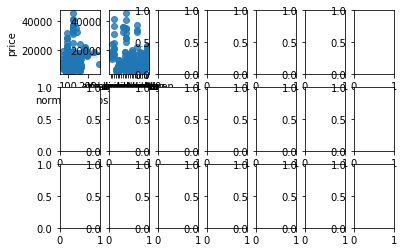

In [23]:

fig, ax = plt.subplots(3,7)
i=j=k=0
for i in range(3):
    for j in range(7):
        k+=1
        sns.regplot(x=df.columns[k], y='price', ax=ax[i][j], data=df)